In [1]:
# Importing necessary libraries
from sklearn.decomposition import PCA
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
import glob


Populating the interactive namespace from numpy and matplotlib


In [2]:
images = []
for img_path in glob.glob('./poker card (2)/poker card/*.bmp'):
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    images.append(img)

D:\Anaconda\Anaconda3\envs\ProjectTKU\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  after removing the cwd from sys.path.


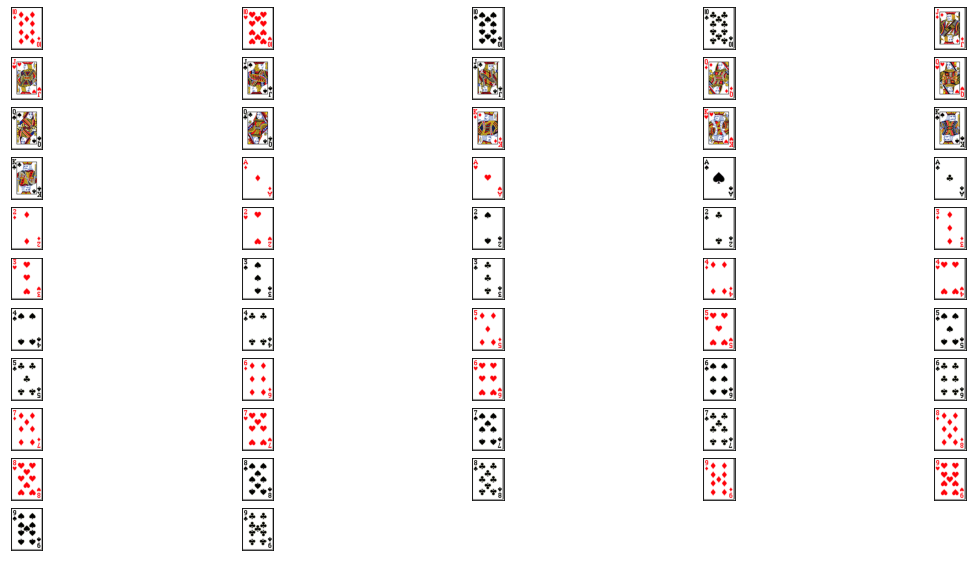

In [3]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

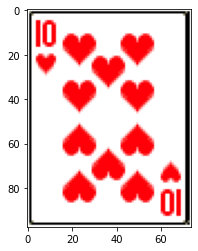

In [4]:
plt.imshow(images[1])
plt.show()

In [5]:
images[1].shape

(98, 74, 3)

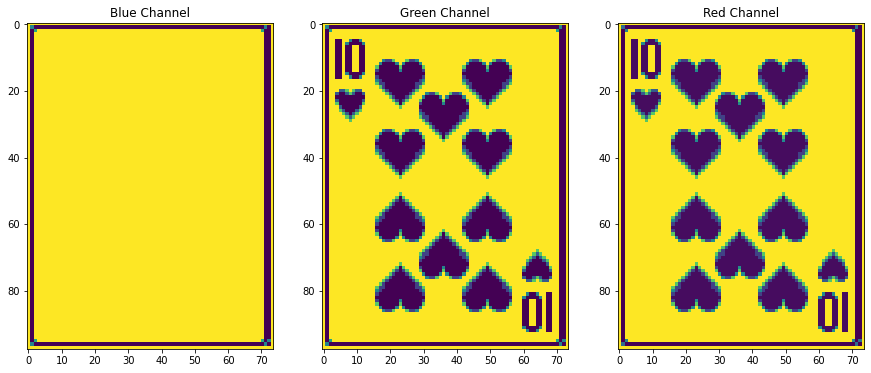

In [9]:
# Splitting into channels
blue, green, red = cv2.split(images[1])
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

## Normalize, scaled between 0 and 1

In [20]:
df_blue = blue/255
df_green = green/255
df_red = red/255

In [21]:
print(blue.shape)
print(red.shape)
print(green.shape)

(98, 74)
(98, 74)
(98, 74)


In [27]:
# Set pca to find principal components that explain 90% of the variation in the data
# 保留 90%
pca_b = PCA(.90)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(.90)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(.90)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [28]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(98, 1)
(98, 6)
(98, 6)


In [29]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9536027582494561
Green Channel: 0.9154239381363466
Red Channel  : 0.9139818490426805


In [30]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(98, 74) (98, 74) (98, 74)


In [31]:
img_reduced = (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(98, 74, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


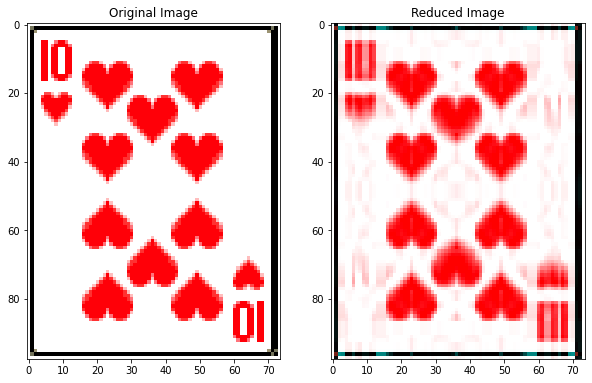

In [32]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(images[1])
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

In [33]:
# Set pca to find principal components that explain 90% of the variation in the data
# 保留 80%
pca_b = PCA(.80)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(.80)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(.80)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [34]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(98, 1)
(98, 4)
(98, 4)


In [35]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9536027582494561
Green Channel: 0.8111466020477751
Red Channel  : 0.8089396610460435


In [36]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(98, 74) (98, 74) (98, 74)


In [37]:
img_reduced = (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(98, 74, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


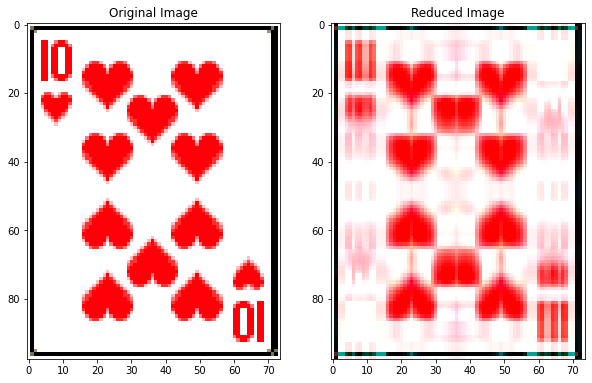

In [38]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(images[1])
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()